In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

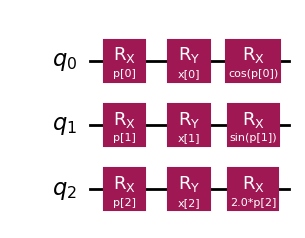

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',3)
x = ParameterVector('x',3)

qc = QuantumCircuit(3)

qc.rx(p[0],0)
qc.rx(p[1],1)
qc.rx(p[2],2)

qc.ry(x[0],0)
qc.ry(x[1],1)
qc.ry(x[2],2)

qc.rx(np.cos(p[0]),0)
qc.rx(np.sin(p[1]),1)
qc.rx(2.0*p[2],2)


#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:
# from squlearn.encoding_circuit import HubregtsenEncodingCircuit
# from qiskit.circuit import ParameterVector



# pqc = HubregtsenEncodingCircuit(3,2,2)

# p = ParameterVector('p',3)
# x = ParameterVector('x',pqc.num_features)

# qc = pqc.get_circuit(p,x)
# qc.draw()

In [5]:
#print(pqc.num_parameters)
#print(pqc.num_features)

In [6]:
from squlearn.observables import SummedPaulis

obs = SummedPaulis(3,)

obs.get_operator(ParameterVector('p',4))

SparsePauliOp(['III', 'IIZ', 'IZI', 'ZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3])])

In [7]:
from qiskit.quantum_info import SparsePauliOp

p_obs = ParameterVector('p_obs',9)

obs = SparsePauliOp('ZZZ',)

obs2= [
    SparsePauliOp('IIZ',p_obs[0])+SparsePauliOp('IZI',p_obs[1])+SparsePauliOp('ZII',p_obs[2]),
    SparsePauliOp('IIX',p_obs[3])+SparsePauliOp('IXI',p_obs[4])+SparsePauliOp('XII',p_obs[5]),
    SparsePauliOp('IIY',p_obs[6])+SparsePauliOp('IYI',p_obs[7])+SparsePauliOp('YII',p_obs[8]),
]

In [8]:
obs2[0].parameters

ParameterView([ParameterVectorElement(p_obs[2]), ParameterVectorElement(p_obs[0]), ParameterVectorElement(p_obs[1])])

In [9]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc, obs2)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._free_parameters",test._free_parameters)

print("test._operators_imag",test._operators_imag)
print("test._operators_real",test._operators_real)
print("test._operators_param",test._operators_param)
print("test._operators_func",test._operators_param_func)

self._qiskit_circuit      ┌──────────┐┌──────────┐┌───────────────┐
q_0: ┤ Rx(p[0]) ├┤ Ry(x[0]) ├┤ Rx(cos(p[0])) ├
     ├──────────┤├──────────┤├───────────────┤
q_1: ┤ Rx(p[1]) ├┤ Ry(x[1]) ├┤ Rx(sin(p[1])) ├
     ├──────────┤├──────────┤└┬──────────────┤
q_2: ┤ Rx(p[2]) ├┤ Ry(x[2]) ├─┤ Rx(2.0*p[2]) ├
     └──────────┘└──────────┘ └──────────────┘
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
ParameterExpression
self._qualcs_obs_parameters ['p_obs']
self._symbol_tuple  (p_obs[2], p_obs[0], p_obs[1], p_obs[4], p_obs[3], p_obs[5], p_obs[6], p_obs[7], p_obs[8])
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
obs: ParameterExpression
test._operation_list [<function qulacs_param_gate_rx at 0x000001D89DC94550>, <function qulacs_pa

In [10]:
test.get_circuit_func()

<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [11]:
np.random.seed(42)
param_obs = np.array(np.random.random(9))
param_val = np.array(np.random.random(3))
x_val = np.array(np.random.random(3))

circ = test.get_circuit_func()(param_val,x_val)

state = QuantumState(3)
sim = QuantumCircuitSimulator(circ, state)
sim.initialize_state(0)
sim.simulate()

observable = Observable(3)
observable.add_operator(1.0, "Z 2 Z 1 Z 0")

print(sim.get_expectation_value(observable))



Adding Parameterized RX gate with angle -0.7080725777960455 on qubit 0
Adding Parameterized RY gate with angle -0.8324426408004217 on qubit 0
Adding Parameterized RX gate with angle -0.7596168254559781 on qubit 0
Adding Parameterized RX gate with angle -0.020584494295802447 on qubit 1
Adding Parameterized RY gate with angle -0.21233911067827616 on qubit 1
Adding Parameterized RX gate with angle -0.020583040644791148 on qubit 1
Adding Parameterized RX gate with angle -0.9699098521619943 on qubit 2
Adding Parameterized RY gate with angle -0.18182496720710062 on qubit 2
Adding Parameterized RX gate with angle -1.9398197043239886 on qubit 2
(0.07308041412003322+0j)


In [12]:
evaluate_circuit(test,param_val,x_val,param_obs)

Adding Parameterized RX gate with angle -0.7080725777960455 on qubit 0
Adding Parameterized RY gate with angle -0.8324426408004217 on qubit 0
Adding Parameterized RX gate with angle -0.7596168254559781 on qubit 0
Adding Parameterized RX gate with angle -0.020584494295802447 on qubit 1
Adding Parameterized RY gate with angle -0.21233911067827616 on qubit 1
Adding Parameterized RX gate with angle -0.020583040644791148 on qubit 1
Adding Parameterized RX gate with angle -0.9699098521619943 on qubit 2
Adding Parameterized RY gate with angle -0.18182496720710062 on qubit 2
Adding Parameterized RX gate with angle -1.9398197043239886 on qubit 2


array([ 0.27833715,  0.22973725, -0.21599543])

In [13]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

val = np.concatenate([param_val,x_val])

est = Estimator()

obs3 = []

ioff = 0
for i,o in enumerate(obs2):
    obs3.append(o.assign_parameters({o.parameters[0]:param_obs[ioff],
                                     o.parameters[1]:param_obs[ioff+1],
                                     o.parameters[2]:param_obs[ioff+2],}))
    ioff+=3

est.run([qc]*len(obs2),obs3,[val]*len(obs2)).result().values

C:\Users\DKR\AppData\Local\Temp\ipykernel_26096\2447760288.py:6: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  est = Estimator()


array([ 0.27833715,  0.22973725, -0.21599543])